<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Zoo.csv")

In [ ]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.duplicated().shape

(101,)

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print(" ")

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64
 
0    58
1    43
Name: hair, dtype: int64
 
0    81
1    20
Name: feathers, dtype: int64
 
1    59
0    42
Name: eggs, dtype: int64
 
0    60
1    41
Name: milk, dtype: int64
 
0    77
1    24
Name: airborne, dtype: int64
 
0    65
1    36
Name: aquatic, dtype: int64
 
1    56
0    45
Name: predator, dtype: int64
 
1    61
0    40
Name: toothed, dtype: int64
 
1    83
0    18
Name: backbone, dtype: int64
 
1    80
0    21
Name: breathes, dtype: int64
 
0    93
1     8
Name: venomous, dtype: int64
 
0    84
1    17
Name: fins, dtype: int64
 
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
 
1    75
0    26
Name: tail, dtype: int64
 
0    88
1    13
Name: domestic, dtype: int64
 
0    57
1    44
Name: catsize, dtype: int64
 
1    41
2    20
4    13
7    10
6     8
3 

In [ ]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

{'whiskers': [<matplotlib.lines.Line2D at 0x79f4edd63040>,
 'caps': [<matplotlib.lines.Line2D at 0x79f4eca53550>,
 'boxes': [<matplotlib.lines.Line2D at 0x79f4edd616f0>],
 'medians': [<matplotlib.lines.Line2D at 0x79f4eece5e40>],
 'fliers': [<matplotlib.lines.Line2D at 0x79f4eece4f40>],
 'means': []}

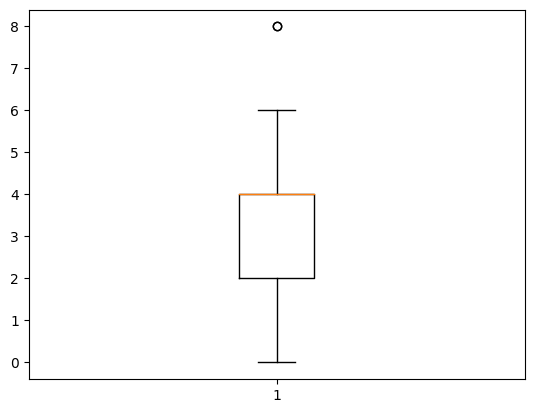

In [ ]:
plt.boxplot(df['legs'])

In [ ]:
Q3 = df['legs'].quantile(q=0.75)
Q1 = df['legs'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

2.0


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['legs'], down, up)
df['legs'] = a

{'whiskers': [<matplotlib.lines.Line2D at 0x79f4ec988d30>,
 'caps': [<matplotlib.lines.Line2D at 0x79f4ec98a1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79f4ec9899f0>],
 'medians': [<matplotlib.lines.Line2D at 0x79f4ec988370>],
 'fliers': [<matplotlib.lines.Line2D at 0x79f4ec98ac80>],
 'means': []}

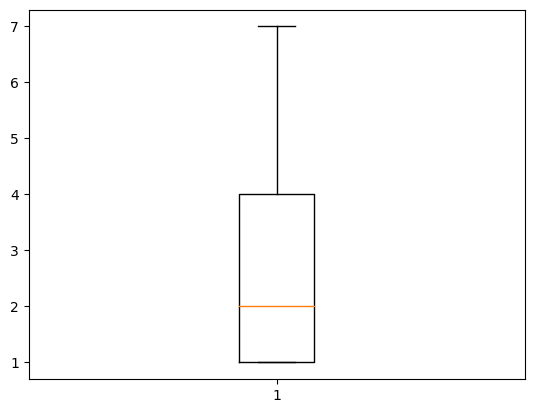

In [ ]:
plt.boxplot(df['type'])

In [ ]:
pip install --upgrade seaborn matplotlib

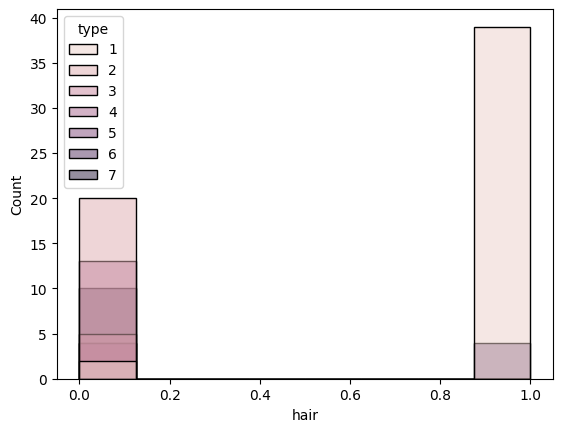

In [ ]:
sns.histplot(x=df['hair'], hue=df['type'], data=df)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


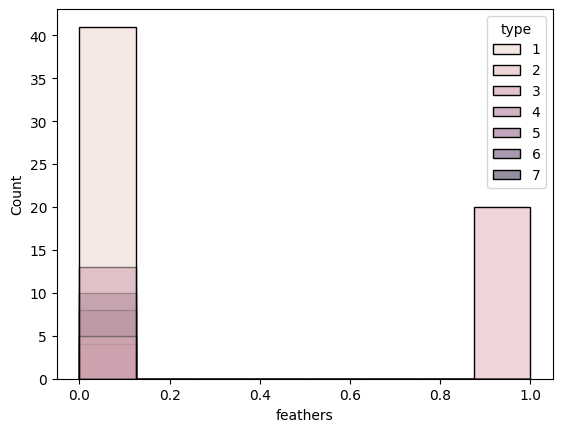

In [ ]:
sns.histplot(x=df['feathers'], hue=df['type'], data=df)
plt.show()

Axes(0.125,0.11;0.775x0.77)


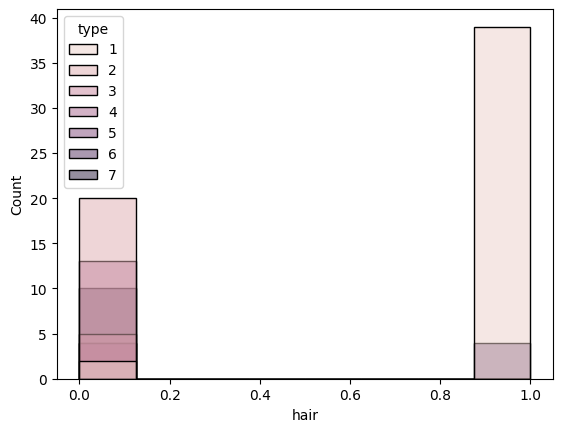

Axes(0.125,0.11;0.775x0.77)


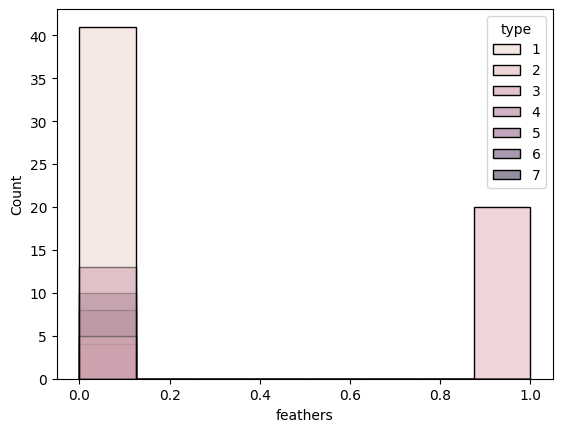

Axes(0.125,0.11;0.775x0.77)


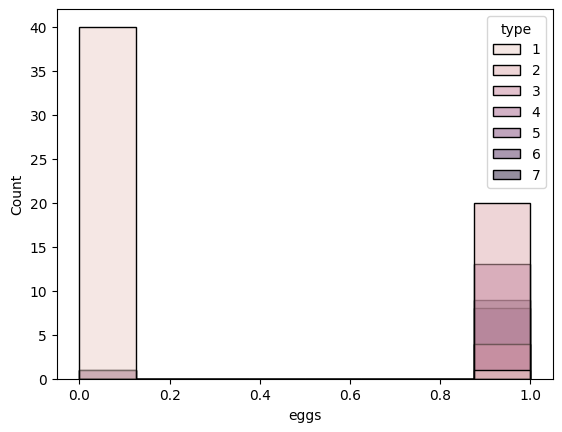

Axes(0.125,0.11;0.775x0.77)


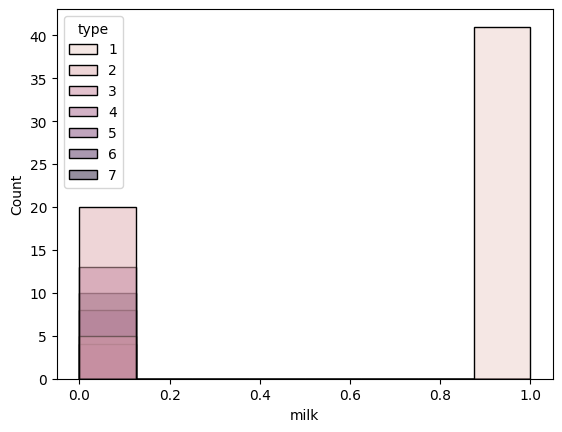

Axes(0.125,0.11;0.775x0.77)


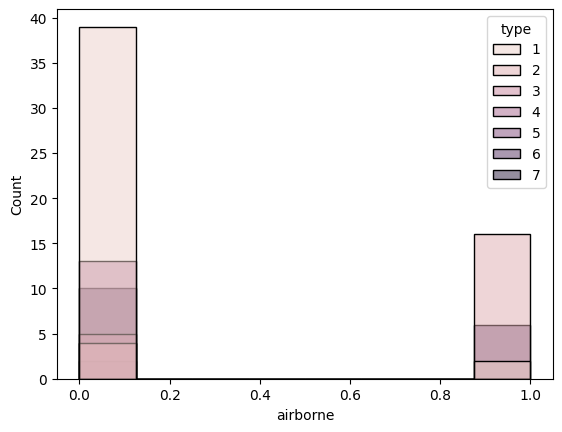

Axes(0.125,0.11;0.775x0.77)


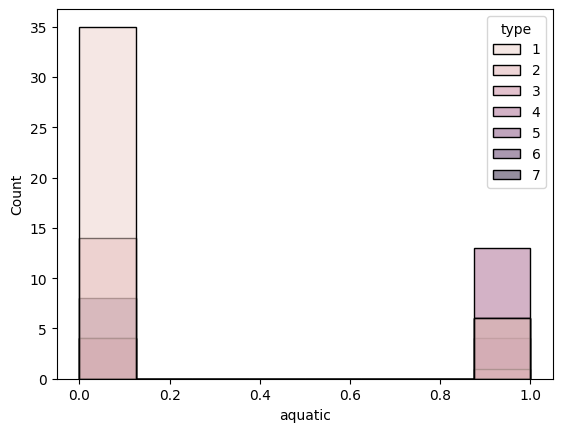

Axes(0.125,0.11;0.775x0.77)


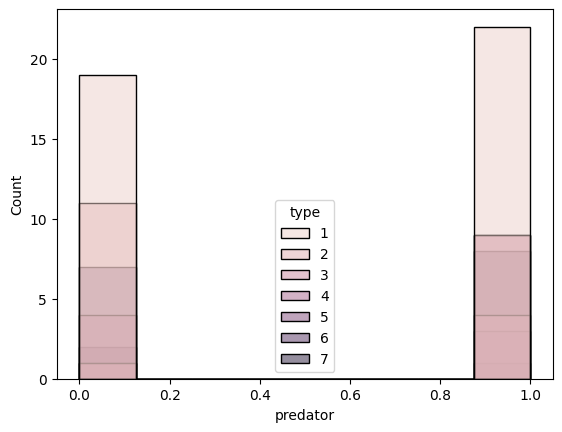

Axes(0.125,0.11;0.775x0.77)


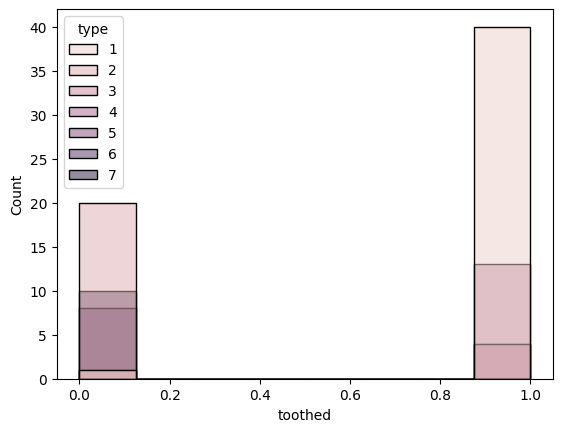

Axes(0.125,0.11;0.775x0.77)


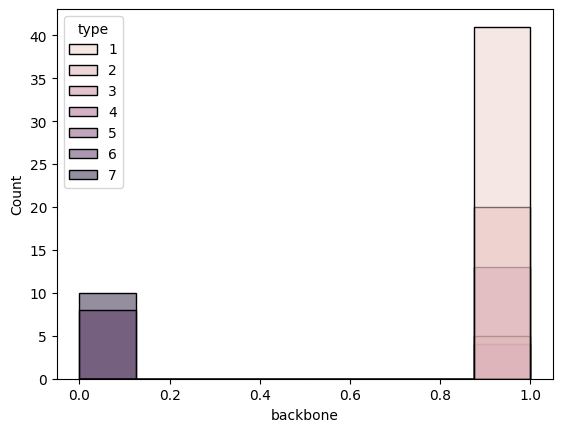

Axes(0.125,0.11;0.775x0.77)


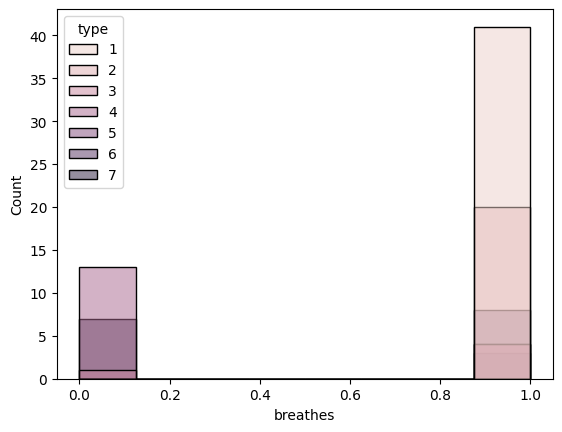

Axes(0.125,0.11;0.775x0.77)


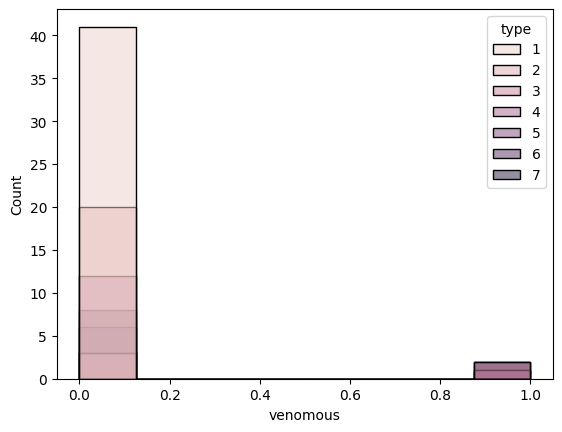

Axes(0.125,0.11;0.775x0.77)


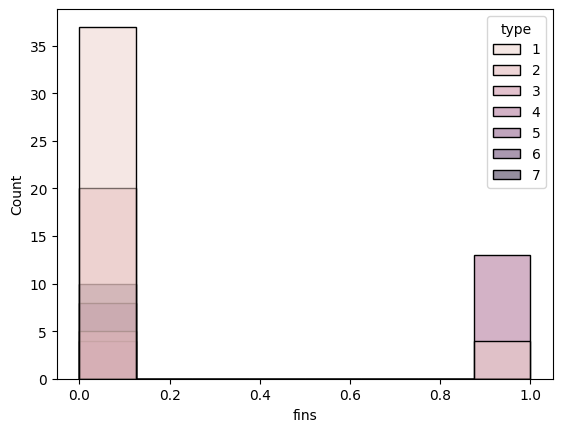

Axes(0.125,0.11;0.775x0.77)


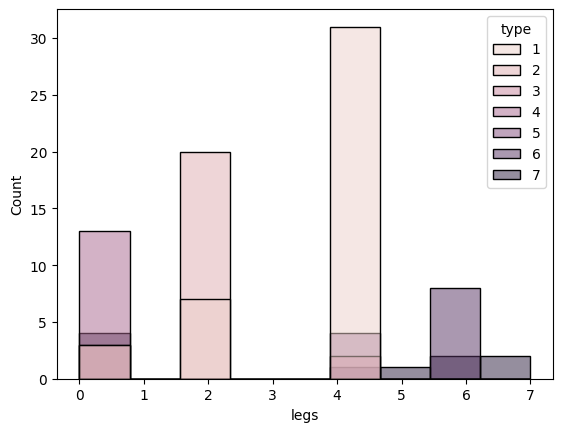

Axes(0.125,0.11;0.775x0.77)


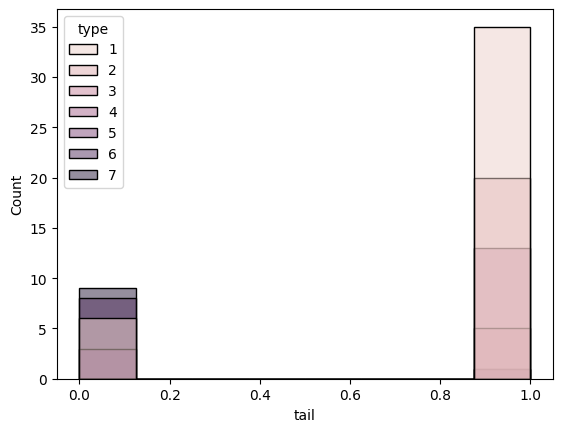

Axes(0.125,0.11;0.775x0.77)


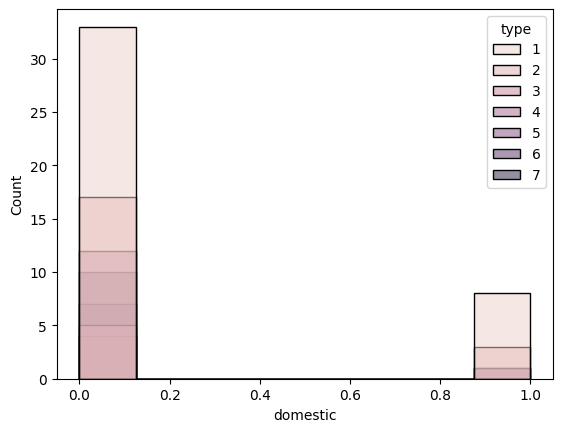

Axes(0.125,0.11;0.775x0.77)


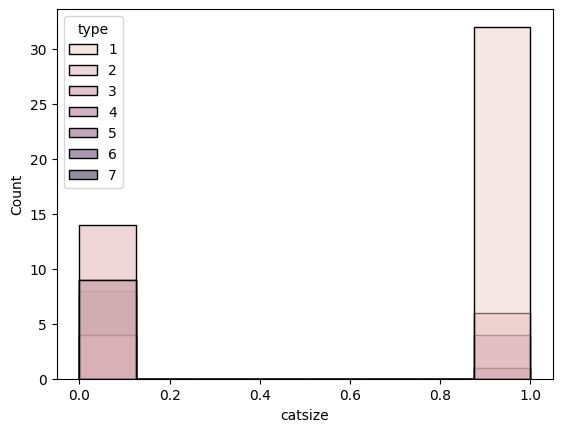

Axes(0.125,0.11;0.775x0.77)


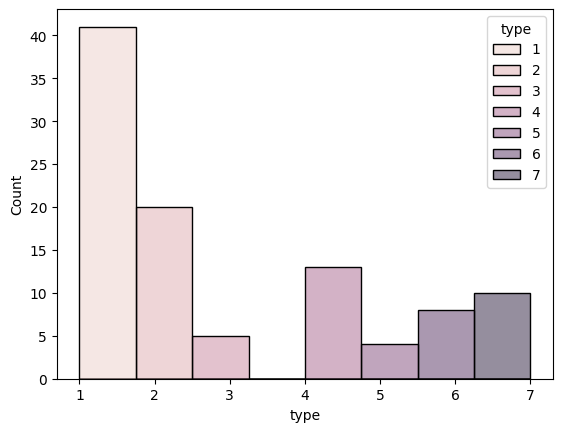

In [ ]:
for i in df.columns:
  if df[i].dtype=='int64':
    print(sns.histplot(x=df[i], hue=df['type'], data=df))
    plt.show()


In [ ]:
#Feature Engineering
df['animal name'] = df['animal name'].str.strip()
df['animal name'] = df['animal name'].replace({'aardvark': 'Mammals',
                                               'antelope' : 'Mammals',
                                               'bear' : 'Mammals',
                                               'buffalo' : 'Mammals',
                                               'boar' : 'Mammals',
                                               'calf' : 'Mammals',
                                               'catfish' : 'Mammals',
                                               'cavy' : 'Mammals',
                                               'cheetah' : 'Mammals',
                                               'chicken' : 'Mammals',
                                               'crow' : 'Mammals',
                                               'deer' : 'Mammals',
                                               'dove' : 'Mammals',
                                               'duck' : 'Mammals',
                                               'elephant' : 'Mammals',
                                               'flamingo' : 'Mammals',
                                               'fruitbat' : 'Mammals',
                                               'giraffe' : 'Mammals',
                                               'gnat' : 'Mammals',
                                               'goat' : 'Mammals',
                                               'gorilla' : 'Mammals',
                                               'gull' : 'Mammals',
                                               'hamster' : 'Mammals',
                                               'hare' : 'Mammals',
                                               'hawk' : 'Mammals',
                                               'honeybee' : 'Mammals',
                                               'housefly' : 'Mammals',
                                               'kiwi' : 'Mammals',
                                               'ladybird' : 'Mammals',
                                               'lark' : 'Mammals',
                                               'leopard' : 'Mammals',
                                               'lion' : 'Mammals',
                                               'lynx' : 'Mammals',
                                               'mink' : 'Mammals',
                                               'mole' : 'Mammals',
                                               'mongoose' : 'Mammals',
                                               'newt' : 'Mammals',
                                               'opossum' : 'Mammals',
                                               'oryx' : 'Mammals',
                                               'ostrich' : 'Mammals',
                                               'parakeet' : 'Mammals',
                                               'penguin' : 'Mammals',
                                               'pheasant' : 'Mammals',
                                               'platypus' : 'Mammals',
                                               'pony' : 'Mammals',
                                               'porpoise' : 'Mammals',
                                               'puma' : 'Mammals',
                                               'pussycat' : 'Mammals',
                                               'raccoon' : 'Mammals',
                                               'reindeer' : 'Mammals',
                                               'seal' : 'Mammals',
                                               'sealion' : 'Mammals' , 'slowworm': 'Mammals', 'squirrel':'Mammals', 'starfish':'Mammals',
                                               'swan' : 'Mammals', 'termite':'Mammals', 'toad':'Mammals', 'tortoise':'Mammals',
                                               'tuatara':'Mammals', 'vole':'Mammals',
                                               'wallaby':'Mammals', 'wolf':'Mammals', 'wren':'Mammals',
                                               'girl' : 'Mammals','dolphin' : 'Mammals'})

df['animal name'] = df['animal name'].str.strip()
df['animal name'] = df['animal name'].replace({'bass' :'Non-Mammals',
                                               'carp' : 'Non-Mammals',
                                               'chub' : 'Non-Mammals',
                                               'clam' : 'Non-Mammals',
                                               'crab' : 'Non-Mammals',
                                               'crayfish': 'Non-Mammals',
                                               'haddock' : 'Non-Mammals',
                                               'herring' : 'Non-Mammals',
                                               'lobster' : 'Non-Mammals',
                                               'octopus' : 'Non-Mammals',
                                               'pike' : 'Non-Mammals',
                                               'piranha' : 'Non-Mammals',
                                               'polecat': 'Non-Mammals',
                                               'scorpion' : 'Non-Mammals',
                                               'seahorse' : 'Non-Mammals',
                                               'seasnake' : 'Non-Mammals',
                                               'seawasp':'Non-Mammals', 'skimmer':'Non-Mammals', 'skua':'Non-Mammals', 'slug' : 'Non-Mammals',
                                               'sole':'Non-Mammals',
                                               'stingray' : 'Non-Mammals', 'vampire':'Non-Mammals', 'vulture':'Non-Mammals',
                                               'wasp':'Non-Mammals', 'worm':'Non-Mammals',
                                               'dogfish':'Non-Mammals','flea':'Non-Mammals','frog':'Non-Mammals','moth':'Non-Mammals',
                                               'pitviper':'Non-Mammals','rhea':'Non-Mammals','sparrow':'Non-Mammals','tuna':'Non-Mammals'})


In [ ]:
df['animal name'].unique()

array(['Mammals', 'Non-Mammals'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['animal name'], drop_first=True)

In [ ]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,animal name_Non-Mammals
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
X = df.drop('type',axis=1)
Y = df['type']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train,Y_train)

0.9571428571428572

In [ ]:
knn.score(X_test,Y_test)

0.967741935483871

In [ ]:
y_pred_test = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_test)
print(accuracy)

0.967741935483871


In [ ]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.94      0.97      0.95        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(Y_test, y_pred_test))

[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  3]]


In [ ]:
x_train = df.drop('type',axis=1)
y_train = df['type']

In [ ]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal name_Non-Mammals
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,1
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


<ipython-input-130-59048b9335f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2d['target'] = y_train
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  hue = data.get(self._hue_var)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  hue = data.get(self._hue_var)


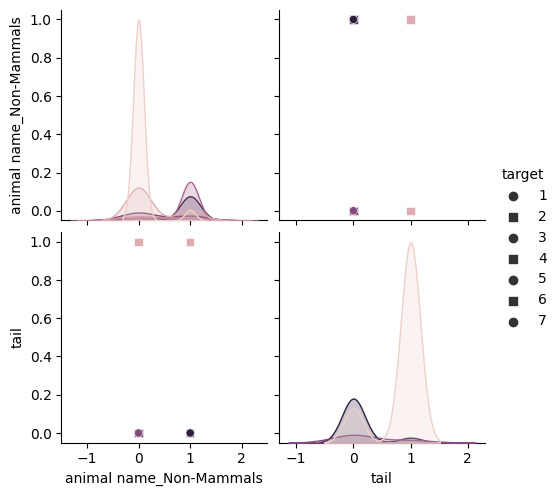

In [ ]:
X_train_2d = x_train[['animal name_Non-Mammals', 'tail']]

# Add the target variable to the data for coloring points
X_train_2d['target'] = y_train

# Use seaborn's pairplot to create scatter plots
sns.pairplot(X_train_2d, hue='target', markers=['o', 's'])
plt.show()

<ipython-input-131-e0e74318c519>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2d['target'] = y_train
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  hue = data.get(self._hue_var)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  hue = data.get(self._hue_var)


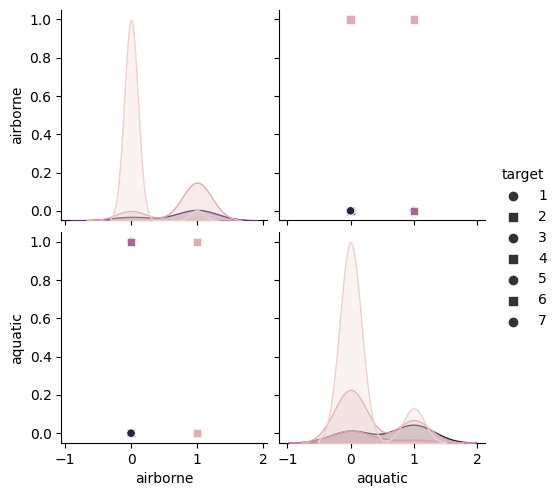

In [ ]:
X_train_2d = x_train[['airborne', 'aquatic']]

# Add the target variable to the data for coloring points
X_train_2d['target'] = y_train

# Use seaborn's pairplot to create scatter plots
sns.pairplot(X_train_2d, hue='target', markers=['o', 's'])
plt.show()

#**NEXT DATASET**

In [ ]:
df1 = pd.read_csv("/content/glass.csv")

In [ ]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


RI :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4ed7596f0>, <matplotlib.lines.Line2D object at 0x79f4ed758e20>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4ed75a4d0>, <matplotlib.lines.Line2D object at 0x79f4ed75a920>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4ed759510>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4ed75b490>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4ed75b790>], 'means': []}


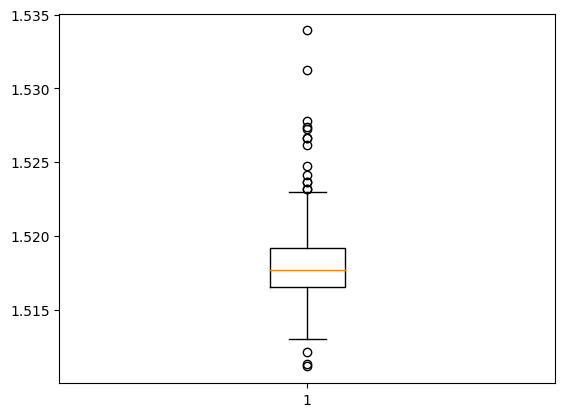

Na :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4edcd0670>, <matplotlib.lines.Line2D object at 0x79f4edcd0160>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4edcd0370>, <matplotlib.lines.Line2D object at 0x79f4edcd02b0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4edcd3b20>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4edcd2710>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4edcd3e50>], 'means': []}


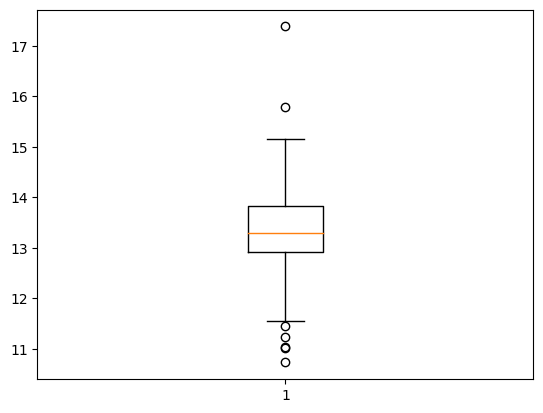

Mg :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4edcd3d30>, <matplotlib.lines.Line2D object at 0x79f4edcd1a80>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4edcd2230>, <matplotlib.lines.Line2D object at 0x79f4edcd0bb0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4ed3481f0>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4edcd28f0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4edcd0340>], 'means': []}


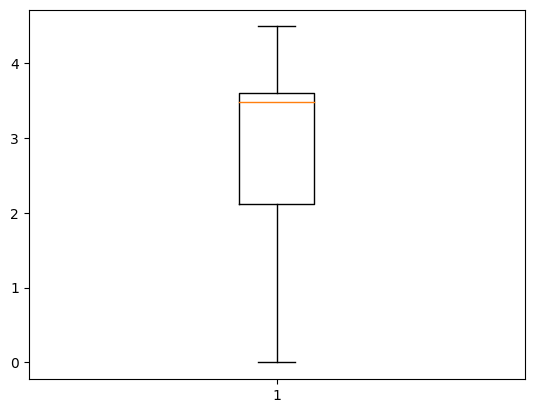

Al :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4ec8dfd90>, <matplotlib.lines.Line2D object at 0x79f4ec8dc5b0>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4ec8dc130>, <matplotlib.lines.Line2D object at 0x79f4ec8deef0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4ec8dd840>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4ec8de680>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4ec8df5b0>], 'means': []}


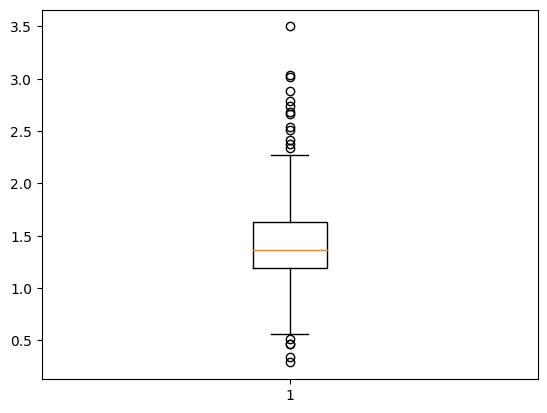

Si :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4ecb85d50>, <matplotlib.lines.Line2D object at 0x79f4ed506b60>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4ed505c00>, <matplotlib.lines.Line2D object at 0x79f4ed506dd0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4ecb87f70>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4ed504bb0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4ed507850>], 'means': []}


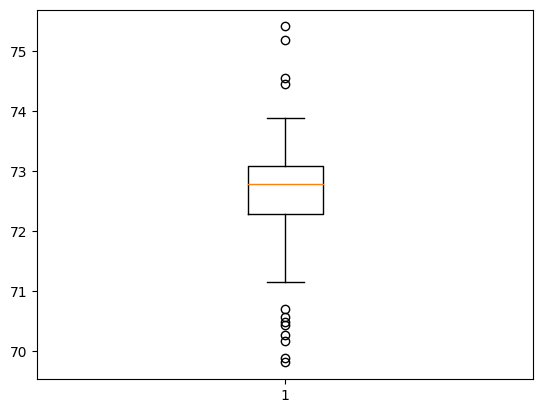

K :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4edcd1600>, <matplotlib.lines.Line2D object at 0x79f4edcd3250>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4edcd21d0>, <matplotlib.lines.Line2D object at 0x79f4ecb857b0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4edcd2f80>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4ecb848b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4edc96bf0>], 'means': []}


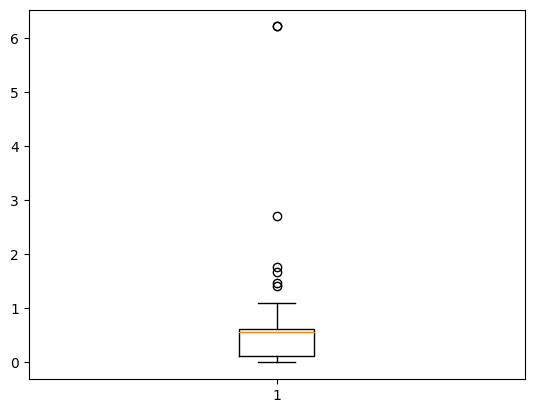

Ca :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4edf0e1a0>, <matplotlib.lines.Line2D object at 0x79f4edf0cee0>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4edf0d2a0>, <matplotlib.lines.Line2D object at 0x79f4edf0cc40>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4ecfd7be0>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4edf0efe0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4edf0e920>], 'means': []}


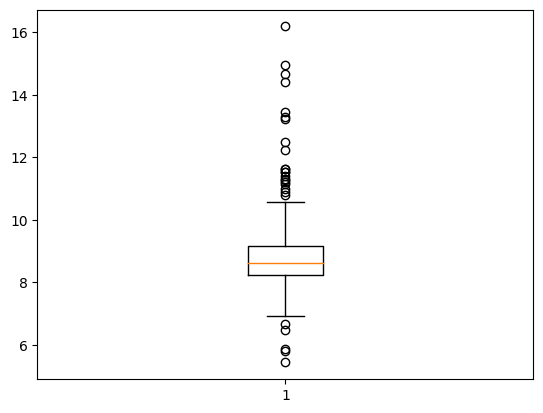

Ba :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4edc94c40>, <matplotlib.lines.Line2D object at 0x79f4edc967a0>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4edc940d0>, <matplotlib.lines.Line2D object at 0x79f4edcd3100>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4edc95570>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4edcd10c0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4edcd3250>], 'means': []}


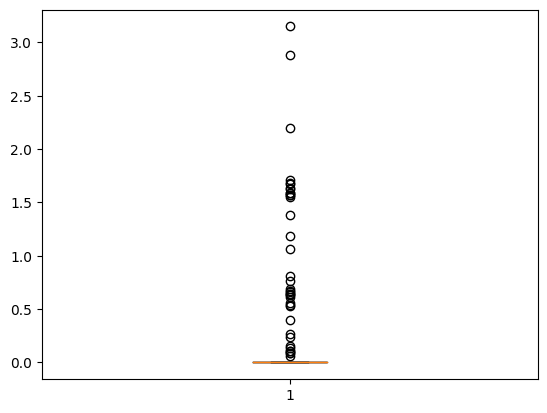

Fe :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4ed591210>, <matplotlib.lines.Line2D object at 0x79f4ed5939d0>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4ed592d70>, <matplotlib.lines.Line2D object at 0x79f4ed590a00>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4ed591480>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4ed64a440>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4ed649330>], 'means': []}


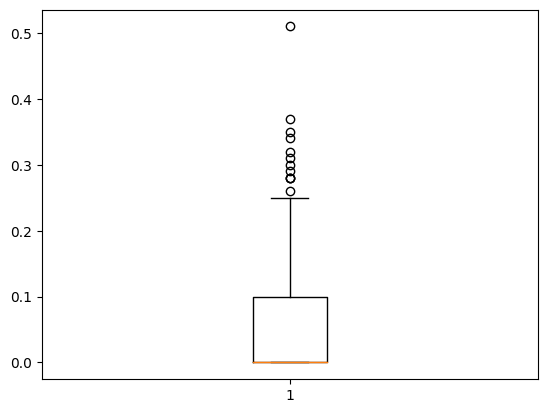

Type :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4edc94f40>, <matplotlib.lines.Line2D object at 0x79f4edc94e80>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4edc95b10>, <matplotlib.lines.Line2D object at 0x79f4edc95cf0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4edc94b80>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4ec848be0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4ec849a80>], 'means': []}


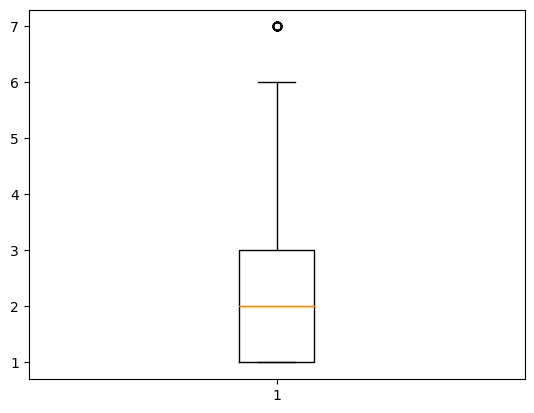

In [ ]:
for i in df1.columns:
  print(i,':')
  print(plt.boxplot(df1[i]))
  plt.show()

In [ ]:
Q3 = df1['RI'].quantile(q=0.75)
Q1 = df1['RI'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


0.002634999999999943


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df1['RI'], down, up)
df1['RI'] = d

In [ ]:
Q3 = df1['Na'].quantile(q=0.75)
Q1 = df1['Na'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


0.9174999999999986


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

e = cap_extreme_values(df1['Na'], down, up)
df1['Na'] = e

In [ ]:
Q3 = df1['Mg'].quantile(q=0.75)
Q1 = df1['Mg'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

1.4850000000000003


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

f = cap_extreme_values(df1['Mg'], down, up)
df1['Mg'] = f

In [ ]:
Q3 = df1['Al'].quantile(q=0.75)
Q1 = df1['Al'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

0.43999999999999995


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

g = cap_extreme_values(df1['Al'], down, up)
df1['Al'] = g

In [ ]:
Q3 = df1['Si'].quantile(q=0.75)
Q1 = df1['Si'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

0.8075000000000045


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

h = cap_extreme_values(df1['Si'], down, up)
df1['Si'] = h

In [ ]:
Q3 = df1['K'].quantile(q=0.75)
Q1 = df1['K'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

0.4875


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

i = cap_extreme_values(df1['K'], down, up)
df1['K'] = i

In [ ]:
Q3 = df1['Ca'].quantile(q=0.75)
Q1 = df1['Ca'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

0.9324999999999992


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

j = cap_extreme_values(df1['Ca'], down, up)
df1['Ca'] = j

In [ ]:
Q3 = df1['Ba'].quantile(q=0.75)
Q1 = df1['Ba'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

0.0


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

k = cap_extreme_values(df1['Ba'], down, up)
df1['Ba'] = k

In [ ]:
Q3 = df1['Fe'].quantile(q=0.75)
Q1 = df1['Fe'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

0.1


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

l = cap_extreme_values(df1['Fe'], down, up)
df1['Fe'] = l

In [ ]:
Q3 = df1['Type'].quantile(q=0.75)
Q1 = df1['Type'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

2.0


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

m = cap_extreme_values(df1['Type'], down, up)
df1['Type'] = m

RI :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e8d24100>, <matplotlib.lines.Line2D object at 0x79f4e8d243a0>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4e8d24640>, <matplotlib.lines.Line2D object at 0x79f4e8d248e0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e8da3e20>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4e8d24b80>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4e8d24e20>], 'means': []}


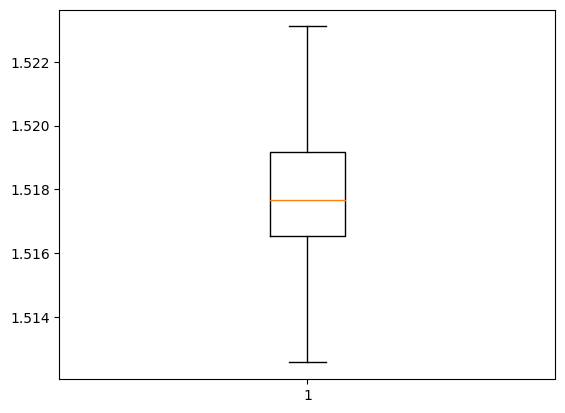

Na :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e8d24c40>, <matplotlib.lines.Line2D object at 0x79f4e8d27730>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4e8d243d0>, <matplotlib.lines.Line2D object at 0x79f4e8d24340>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e8d26e90>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4e8d24a00>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4e8d249d0>], 'means': []}


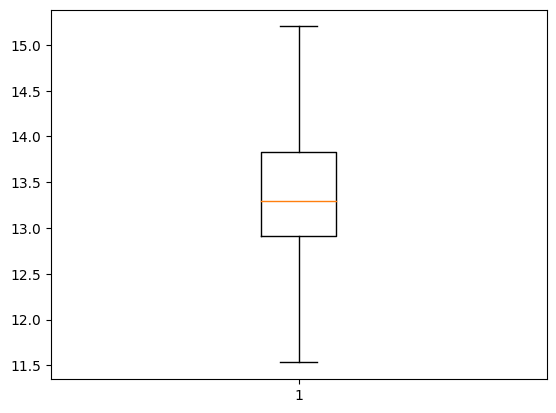

Mg :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4ec8ddf30>, <matplotlib.lines.Line2D object at 0x79f4e7fcfd30>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4edf0e8f0>, <matplotlib.lines.Line2D object at 0x79f4edf0c220>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4ec8df190>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4edf0d360>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4edf0e8c0>], 'means': []}


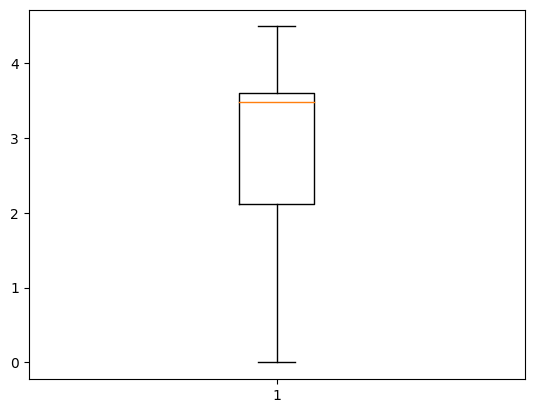

Al :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e7dfc0d0>, <matplotlib.lines.Line2D object at 0x79f4e7dfc700>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4ec8dd180>, <matplotlib.lines.Line2D object at 0x79f4ec8dc970>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e7dfc3d0>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4ec8de3b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4ec8dfdc0>], 'means': []}


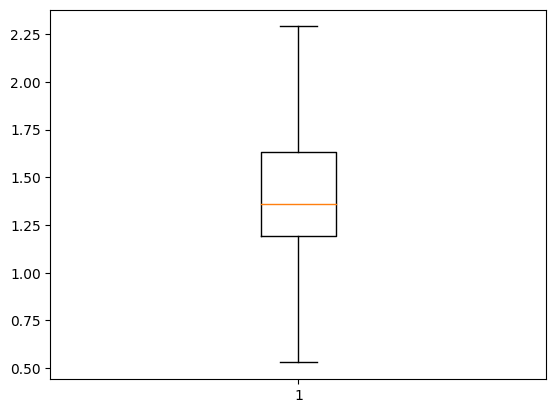

Si :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e7e23b20>, <matplotlib.lines.Line2D object at 0x79f4e7e23dc0>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4e7e440a0>, <matplotlib.lines.Line2D object at 0x79f4e7e44340>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e7e239a0>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4e7e445e0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4e7e44880>], 'means': []}


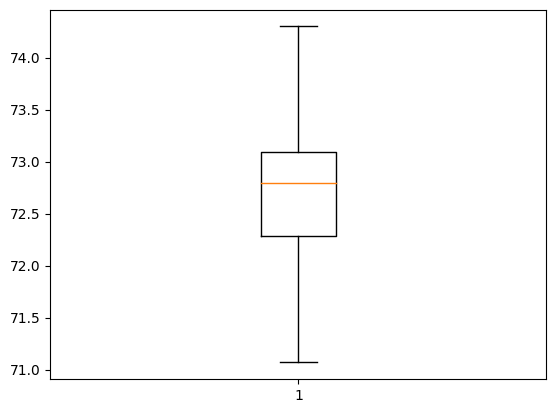

K :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e7e22890>, <matplotlib.lines.Line2D object at 0x79f4e7e21c30>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4e7e21060>, <matplotlib.lines.Line2D object at 0x79f4e7e23b50>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e7e23e80>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4e7e23ac0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4e7e23f10>], 'means': []}


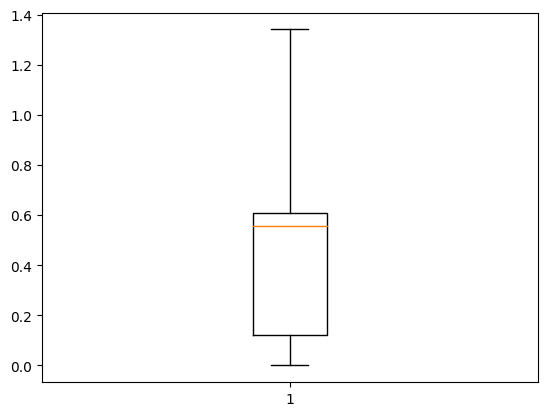

Ca :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e7e7e800>, <matplotlib.lines.Line2D object at 0x79f4e7e7eaa0>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4e7e7ed40>, <matplotlib.lines.Line2D object at 0x79f4e7e7efe0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e7e7e560>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4e7e7f280>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4e7e7f520>], 'means': []}


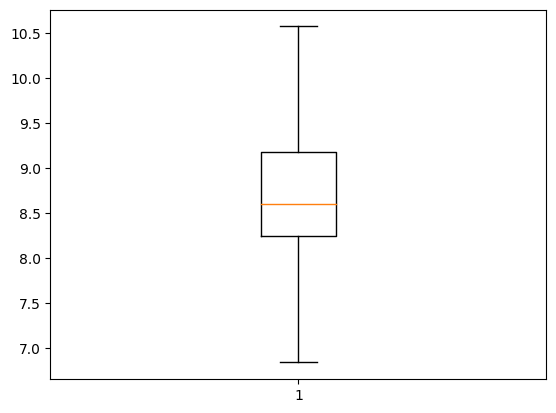

Ba :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e8d0a4d0>, <matplotlib.lines.Line2D object at 0x79f4e8d08040>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4e8d0b850>, <matplotlib.lines.Line2D object at 0x79f4e8d090c0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e8d0ba60>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4e8d0bd00>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4e8d09390>], 'means': []}


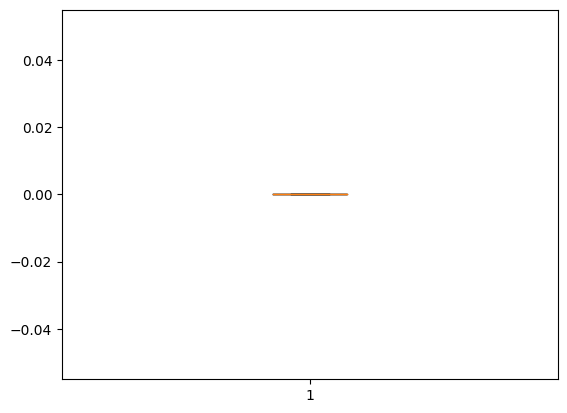

Fe :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e7e211b0>, <matplotlib.lines.Line2D object at 0x79f4e7e22710>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4e7e210f0>, <matplotlib.lines.Line2D object at 0x79f4e7ed8850>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e7e47fa0>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4e7ed8af0>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4e7ed8d90>], 'means': []}


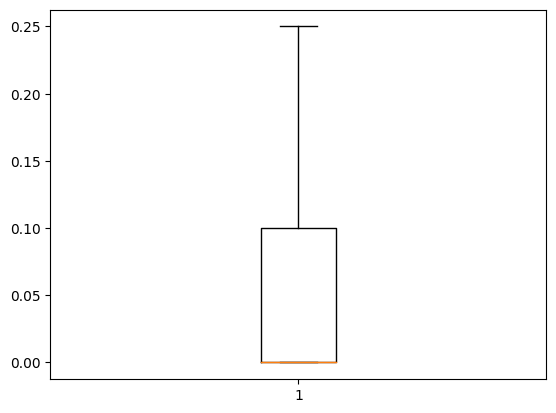

Type :
{'whiskers': [<matplotlib.lines.Line2D object at 0x79f4e7d2dde0>, <matplotlib.lines.Line2D object at 0x79f4e7d2e080>], 'caps': [<matplotlib.lines.Line2D object at 0x79f4e7d2e320>, <matplotlib.lines.Line2D object at 0x79f4e7d2e5c0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79f4e7d2dc60>], 'medians': [<matplotlib.lines.Line2D object at 0x79f4e7d2e860>], 'fliers': [<matplotlib.lines.Line2D object at 0x79f4e7d2eb00>], 'means': []}


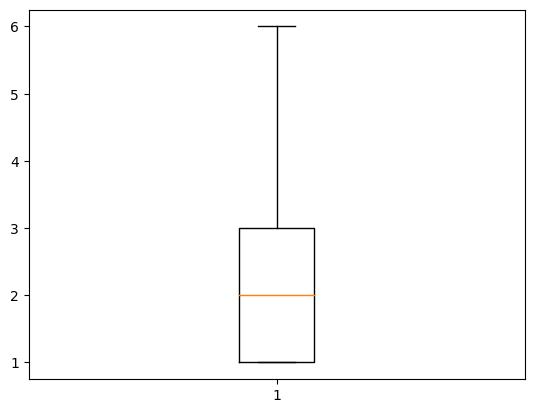

In [ ]:
for i in df1.columns:
  print(i,':')
  print(plt.boxplot(df1[i]))
  plt.show()

In [ ]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


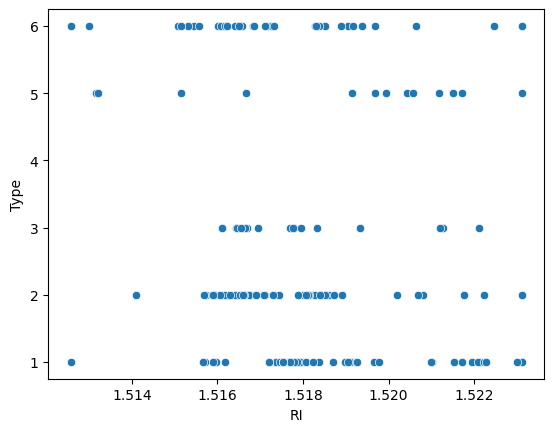

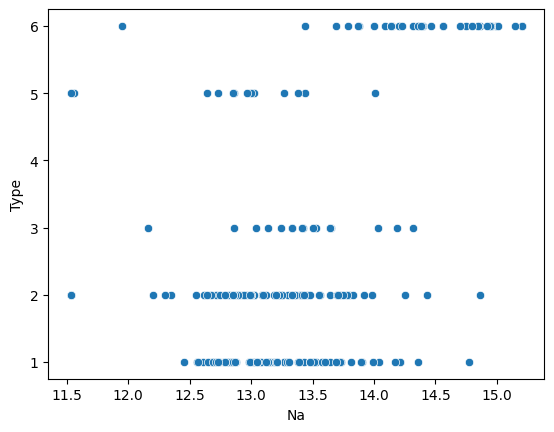

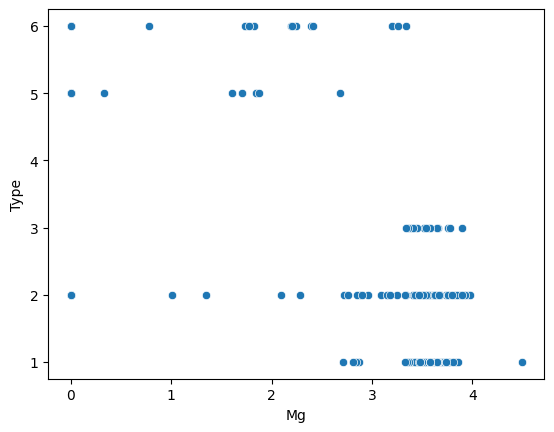

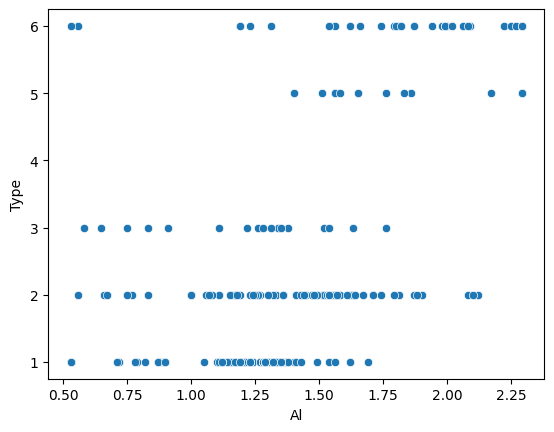

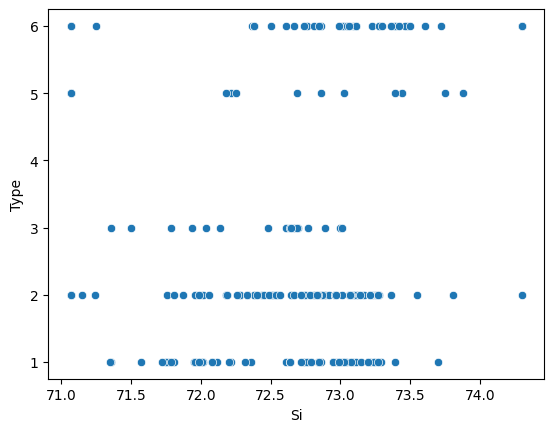

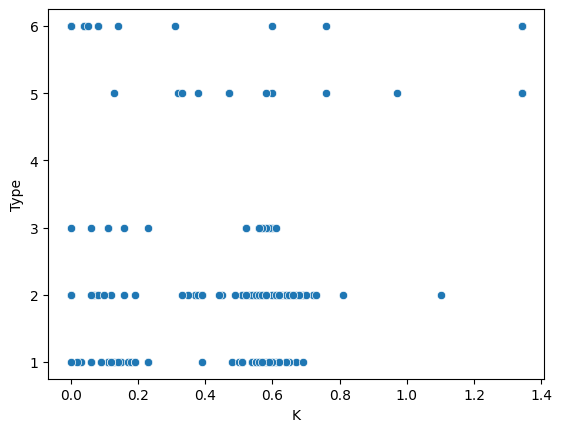

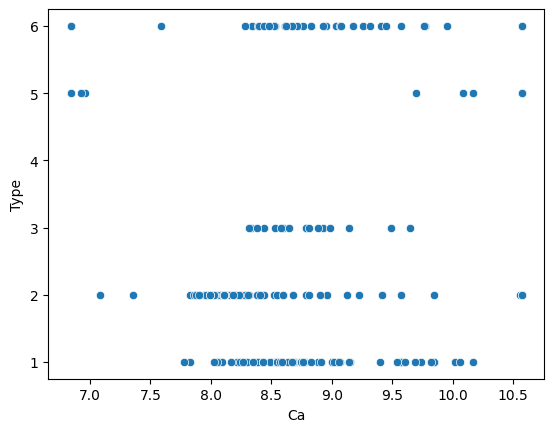

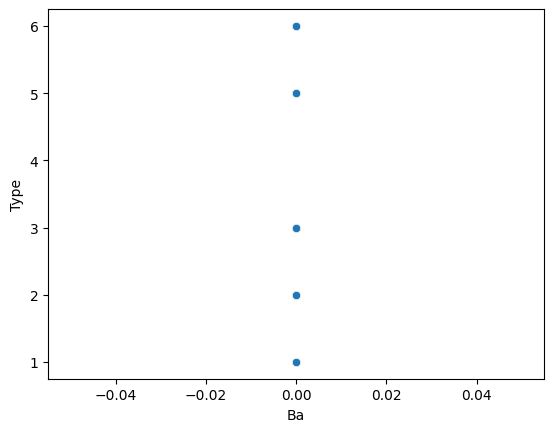

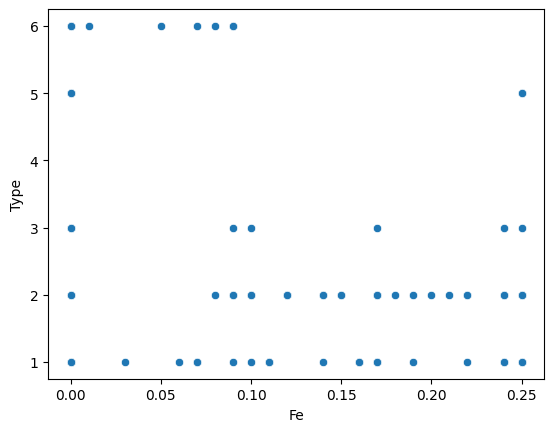

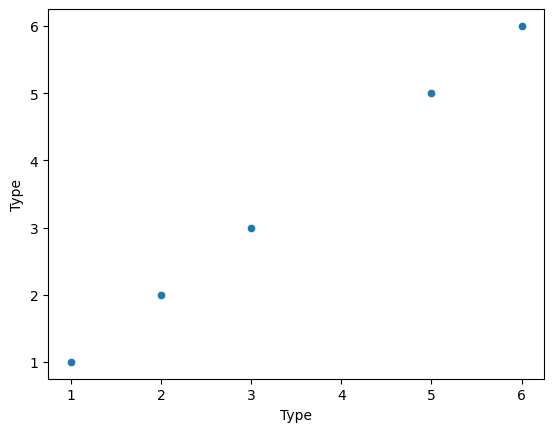

In [ ]:
for i in df1.columns:
  sns.scatterplot(x=df1[i],y=df1['Type'], data=df)
  plt.show()

In [ ]:
df1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.064047,-0.032721,-0.470391,-0.532124,-0.344942,0.760449,NaN,0.094617,-0.160699
Na,-0.064047,1.000000,-0.295178,0.208865,-0.164674,-0.493401,-0.102396,NaN,-0.251377,0.496850
Mg,-0.032721,-0.295178,1.000000,-0.474507,-0.210539,0.326625,-0.371040,NaN,0.101841,-0.740712
Al,-0.470391,0.208865,-0.474507,1.000000,0.142701,0.183350,-0.281499,NaN,-0.089357,0.587248
Si,-0.532124,-0.164674,-0.210539,0.142701,1.000000,-0.034263,-0.192171,NaN,-0.064187,0.171085
K,-0.344942,-0.493401,0.326625,0.183350,-0.034263,1.000000,-0.499029,NaN,0.078367,-0.234991
Ca,0.760449,-0.102396,-0.371040,-0.281499,-0.192171,-0.499029,1.000000,NaN,0.103456,0.069202
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.094617,-0.251377,0.101841,-0.089357,-0.064187,0.078367,0.103456,NaN,1.000000,-0.216006
Type,-0.160699,0.496850,-0.740712,0.587248,0.171085,-0.234991,0.069202,NaN,-0.216006,1.000000


In [ ]:
X = df1.drop(['Type','Ba','K','Fe','Si'],axis=1)
Y = df1['Type']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [ ]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_train,Y_train)

0.8111888111888111

In [ ]:
knn.score(X_test,Y_test)

0.8028169014084507

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(KNeighborsClassifier(n_neighbors=best_k), X_train, Y_train, cv=5, scoring='accuracy')

In [ ]:
accuracy_scores

array([0.7       , 0.76666667, 0.83333333, 0.66666667, 0.75862069])

In [ ]:
y_pred_test = knn.predict(X_test)
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.71      0.93      0.81        27
           2       0.95      0.82      0.88        22
           3       0.50      0.14      0.22         7
           5       0.75      1.00      0.86         3
           6       0.91      0.83      0.87        12

    accuracy                           0.80        71
   macro avg       0.76      0.74      0.73        71
weighted avg       0.80      0.80      0.78        71



In [ ]:
print(confusion_matrix(Y_test, y_pred_test))

[[25  1  1  0  0]
 [ 2 18  0  1  1]
 [ 6  0  1  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 10]]


In [ ]:
x_train = df1.drop('Type',axis=1)
y_train = df1['Type']

In [ ]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0


<ipython-input-730-b3ac7d434c0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2d['target'] = y_train
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  hue = data.get(self._hue_var)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  hue = data.get(self._hue_var)


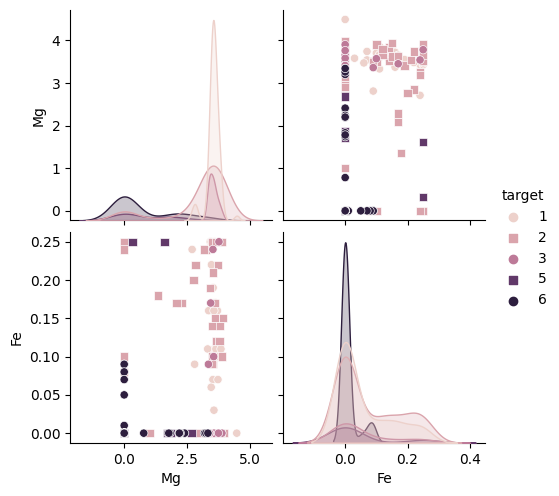

In [ ]:
X_train_2d = x_train[['Mg', 'Fe']]

# Add the target variable to the data for coloring points
X_train_2d['target'] = y_train

# Use seaborn's pairplot to create scatter plots
sns.pairplot(X_train_2d, hue='target', markers=['o', 's'])
plt.show()

<ipython-input-731-8939626da57b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2d['target'] = y_train
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  hue = data.get(self._hue_var)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  hue = data.get(self._hue_var)


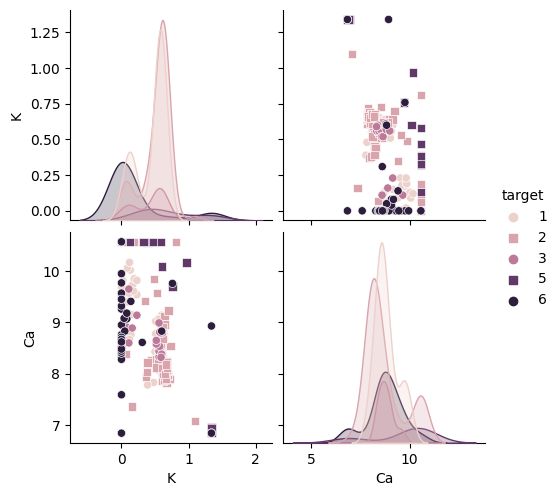

In [ ]:
X_train_2d = x_train[['K', 'Ca']]

# Add the target variable to the data for coloring points
X_train_2d['target'] = y_train

# Use seaborn's pairplot to create scatter plots
sns.pairplot(X_train_2d, hue='target', markers=['o', 's'])
plt.show()